In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns

In [3]:
train_df=pd.read_csv('/content/drive/MyDrive/Kaggle\/train')
test_df=pd.read_csv('/content/drive/MyDrive/Kaggle\/test')

In [6]:
train_df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [7]:
col=list(train_df.columns)

In [8]:
col.remove('class')

In [12]:
x_train.shape

(19997, 64)

In [13]:
x_test.shape

(9850, 64)

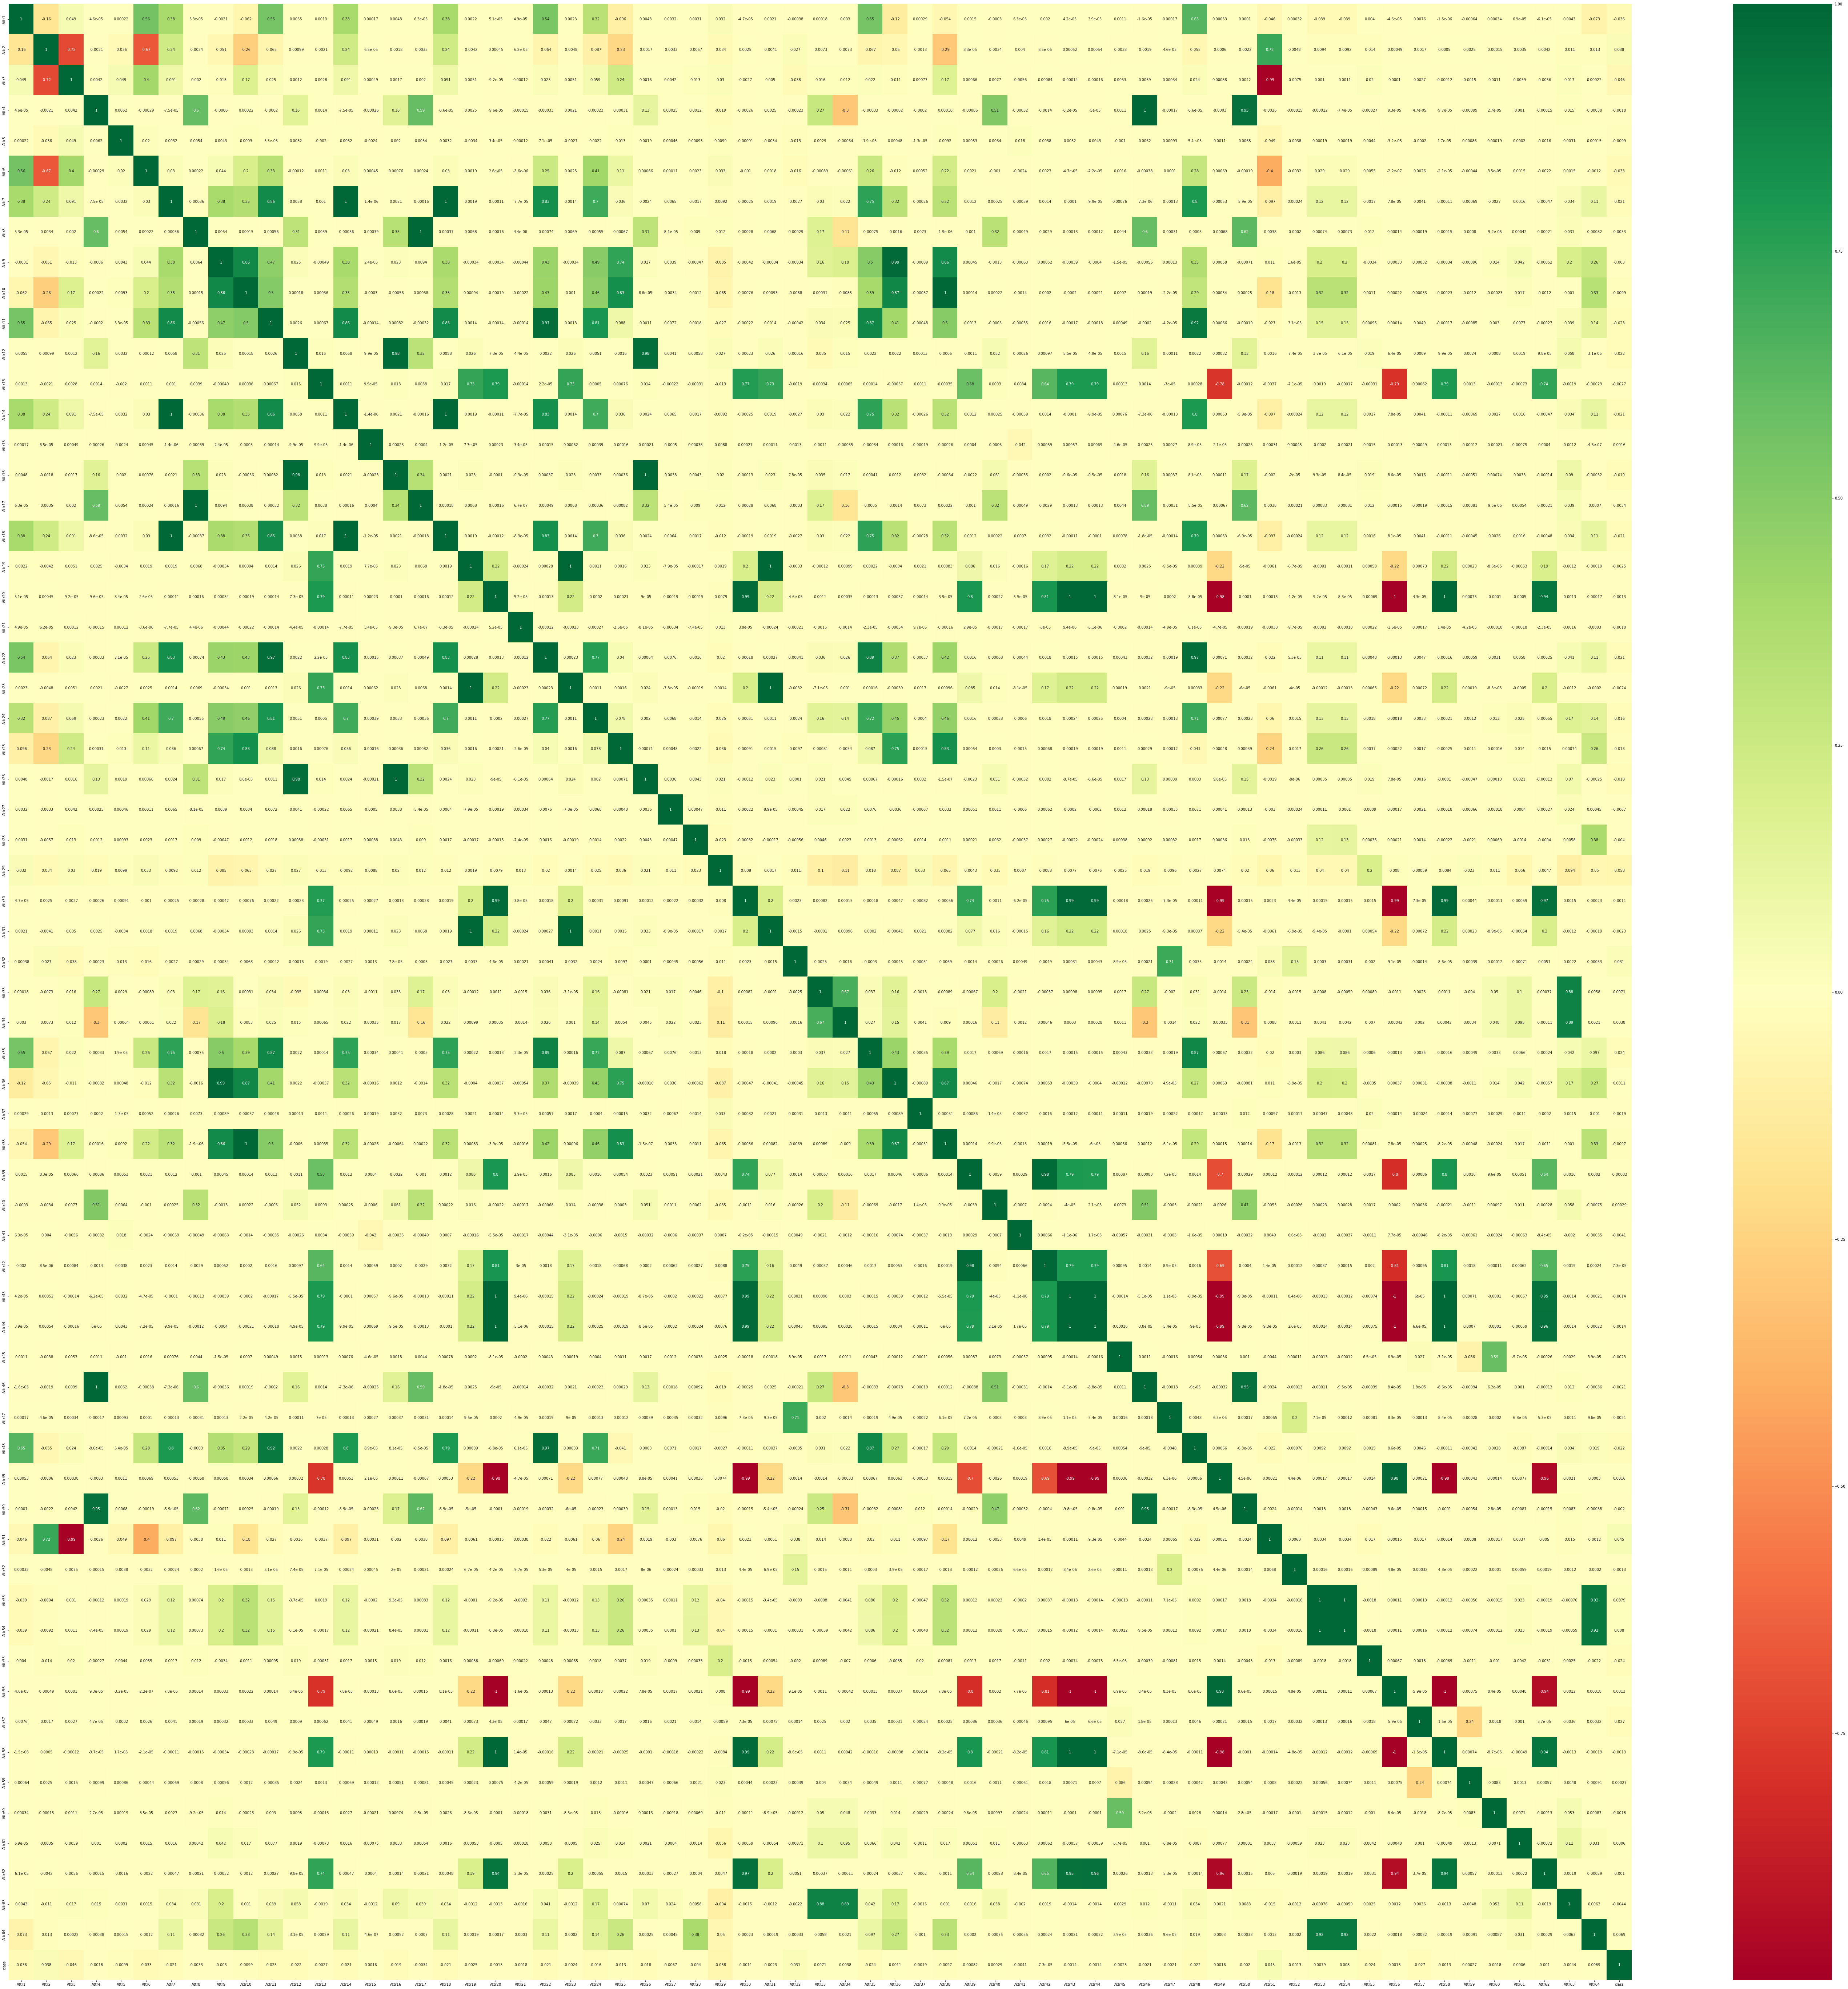

In [17]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


[0.02490274 0.01623405 0.01653502 0.01368152 0.01090641 0.01477259
 0.01525627 0.01381866 0.01486958 0.01539261 0.01514608 0.01261188
 0.01228306 0.01649115 0.01517401 0.01323995 0.01299588 0.01502839
 0.01183073 0.01699517 0.01661437 0.01676062 0.01264671 0.02237803
 0.01714823 0.01376987 0.02542849 0.01270807 0.01727301 0.01267014
 0.01119226 0.01568373 0.0143562  0.01724411 0.01900823 0.01528992
 0.02655781 0.01685666 0.01509866 0.01550622 0.01393159 0.01357688
 0.01314679 0.0164948  0.01583601 0.02572311 0.0154906  0.01409276
 0.01280123 0.01456231 0.01940372 0.01255481 0.0135445  0.01281918
 0.01599566 0.01699943 0.01463262 0.01980748 0.01278755 0.01692221
 0.01656118 0.01304082 0.01327751 0.01364015]


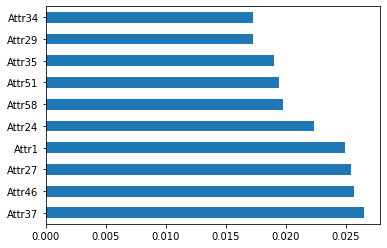

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
X=train_df[['Attr34','Attr29','Attr35','Attr51','Attr58','Attr24','Attr1','Attr27','Attr46','Attr37']]
Y=train_df['class']



x_train, x_test, y_train, y_test = tts(X,Y, test_size = 0.33, random_state = 42)

In [26]:
from xgboost import XGBClassifier

In [24]:
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X,Y)

In [37]:
y_prid=clf.predict(x_test)

In [38]:
roc_auc_score(y_test,y_prid)

0.8245130848952071

In [34]:
clf = XGBClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9829441624365483

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
 
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)


AttributeError: ignored

In [51]:
tuning.cv_results_

{'mean_fit_time': array([  7.61193027,  18.92340097,  37.78560085,  56.684021  ,
         75.37551765,  94.17186284, 112.78994832, 132.13154316,
          7.55910134,  18.91380019,  37.7615263 ,  56.66515779,
         75.51175871,  94.49972034, 113.28062305, 132.17241793,
          7.57467585,  18.809764  ,  37.80209169,  56.60245194,
         75.37330246,  94.36399326, 113.26331544, 132.06097927,
          7.56091056,  18.83833246,  37.63533821,  56.3859324 ,
         75.23770337,  94.05206327, 113.21564503, 131.96026244,
          7.53191829,  18.82868643,  37.65107522,  56.40750451,
         75.24405861,  94.06303949, 112.96883965, 131.8110929 ,
          7.54376621,  18.76606121,  37.57460618,  56.47037601,
         75.27193818,  94.20771317, 112.99760942, 116.27522388]),
 'mean_score_time': array([0.03231688, 0.05686278, 0.11112447, 0.15939536, 0.21200271,
        0.27018061, 0.31903095, 0.36270947, 0.03506227, 0.05903497,
        0.11181254, 0.16052799, 0.21485605, 0.27007384, 0.

In [52]:
tuning.best_score_

0.9850977244311079

In [53]:
tuning.best_params_

{'learning_rate': 0.1, 'n_estimators': 1500}

In [54]:
tuning.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=1500,
                           random_state=10, subsample=1)

In [55]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)


AttributeError: ignored

In [56]:
tuning.best_params_, tuning.best_score_

({'max_depth': 5}, 0.9853477369342336)